In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy


(array([ 2., 16.,  8., 17., 14., 18., 12.,  6.,  6.,  1.]),
 array([0.06994998, 0.52720011, 0.98445024, 1.44170037, 1.8989505 ,
        2.35620063, 2.81345076, 3.27070088, 3.72795101, 4.18520114,
        4.64245127]),
 <BarContainer object of 10 artists>)

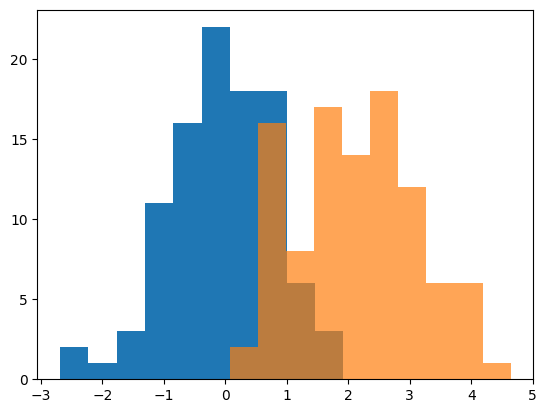

In [5]:
size = 100
sample_1 = np.random.normal(0, size=size)
sample_2 = np.random.normal(2, size=size)

plt.hist(sample_1)
plt.hist(sample_2, alpha=0.7)


In [ ]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(sample_1, sample_2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -16.57123566304896
P-value: 2.9096802405016786e-39


In [19]:
df = pd.read_csv("Lab_wk5.csv")

df.head()


,Group,Sample_ID,Site_Type,Porosity,Kozeny-Carmen,Rosetta,Constant_Head,Falling_Head
0,1,1.1.A,T,0.46,0.0255,0.01620,0.00191,0.000019
1,1,1.2.A,T,0.52,0.0748,0.01730,0.03550,0.000355
2,1,1.3.A,T,0.52,0.0687,0.01770,0.00701,0.000070
3,2,2.1.A,T,0.43,0.0135,0.00765,0.09000,2.000000
4,2,2.2.A,T,0.38,0.0561,0.01260,0.05000,2.000000


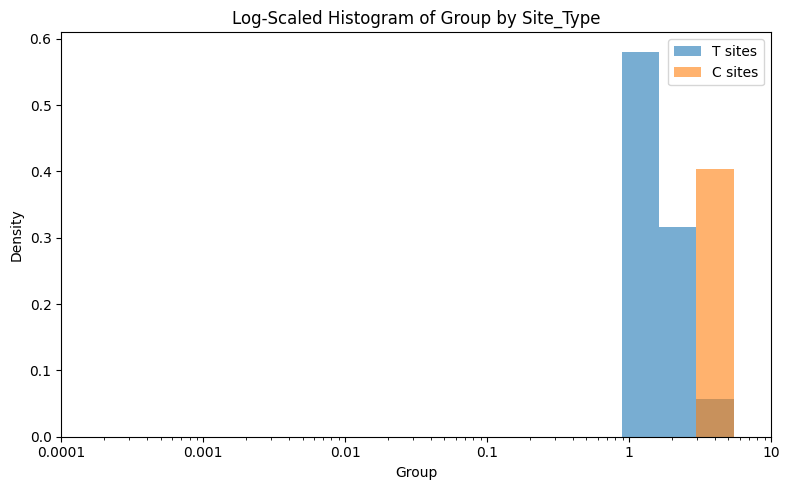

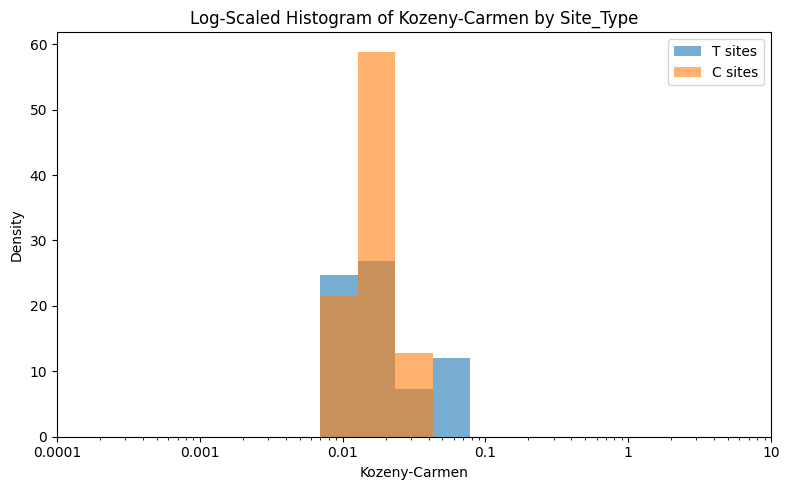

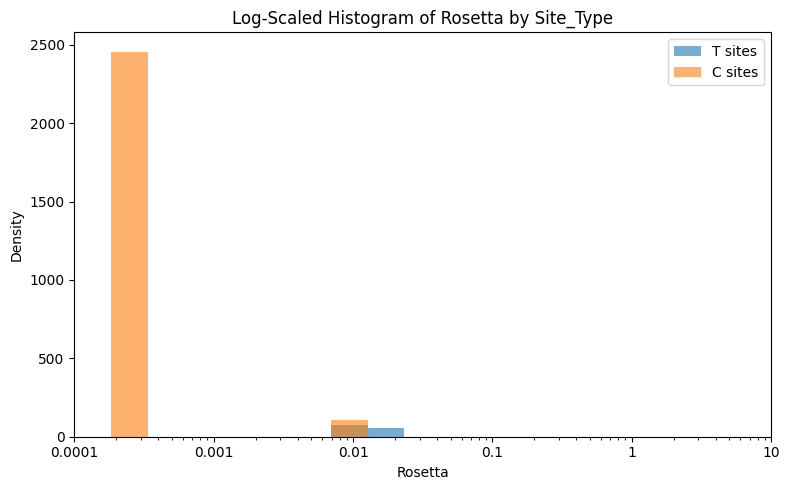

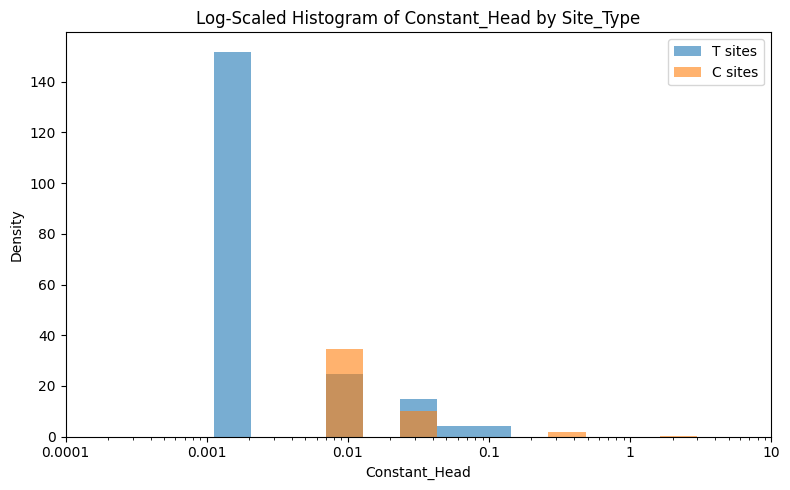

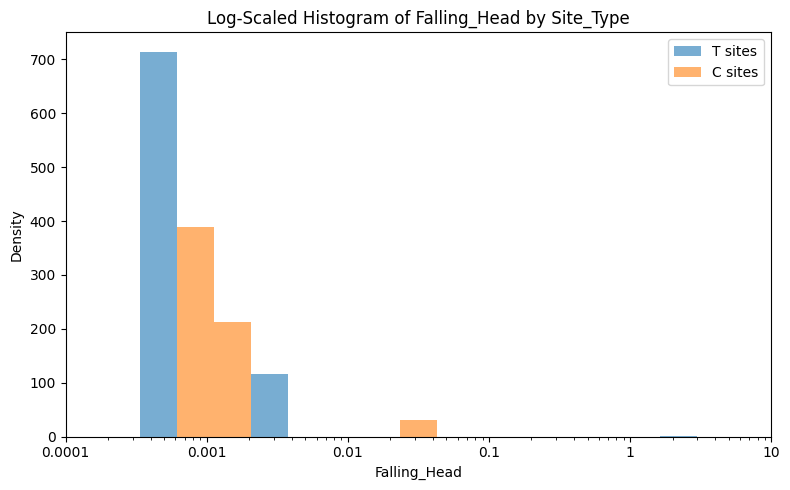

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv("Lab_wk5.csv")
df.columns = df.columns.str.strip()  # Remove trailing spaces

def plot_all_log_histograms(data, group_col='Site_Type', bins=20, x_min=1e-4, x_max=10):
    numeric_cols = data.select_dtypes(include='number').columns
    bin_edges = np.logspace(np.log10(x_min), np.log10(x_max), bins)

    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        for site_type in data[group_col].unique():
            subset = data[data[group_col] == site_type][col].dropna()
            plt.hist(subset, bins=bin_edges, alpha=0.6, label=f"{site_type} sites", density=True)

        plt.xscale('log')
        plt.xlim(x_min, x_max)
        plt.xticks([0.0001, 0.001, 0.01, 0.1, 1, 10], labels=['0.0001', '0.001', '0.01', '0.1', '1', '10'])
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.title(f"Log-Scaled Histogram of {col} by {group_col}")
        plt.legend()
        plt.tight_layout()
        plt.show()

# Run it
plot_all_log_histograms(df)



In [32]:
python -m ensurepip --upgrade




SyntaxError: invalid syntax (1045692842.py, line 1)

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv("Lab_wk5.csv")
df.columns = df.columns.str.strip()

# Function to plot box plots for all numeric columns
def plot_all_boxplots_by_site_type(data, group_col='Site_Type'):
    numeric_cols = data.select_dtypes(include='number').columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=data, x=group_col, y=col)
        plt.yscale('log')  # Log scale for conductivity-style data
        plt.title(f"Box Plot of {col} by {group_col}")
        plt.ylabel(col)
        plt.xlabel(group_col)
        plt.tight_layout()
        plt.show()

# Run it
plot_all_boxplots_by_site_type(df)



ModuleNotFoundError: No module named 'seaborn'